# 任务四模型使用及预测营销方法

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from model import EPARNNModel,EPADNNModel
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
# 初始化模型并载入模型数据

epa_model = EPADNNModel()
epa_model.load_state_dict(torch.load('model_weights.pth'))
epa_model.eval()

EPADNNModel(
  (linear1): Linear(in_features=3045, out_features=4096, bias=True)
  (fc1): ReLU()
  (linear2): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): ReLU()
  (linear3): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): ReLU()
  (linear4): Linear(in_features=1024, out_features=609, bias=True)
)

In [3]:
# 载入测试数据

consume_data = np.load('data/consume_data_bm.npy')
type_data = np.load('data/type_data_bm.npy')

consume_data.shape,type_data.shape

((1, 609), (1, 609, 5))

In [4]:
# 预测数据

pred_data = epa_model(torch.from_numpy(type_data).to(dtype=torch.float32)).detach().numpy()

pred_data.shape

(1, 609)

Text(0, 0.5, 'bm_data and pred_data')

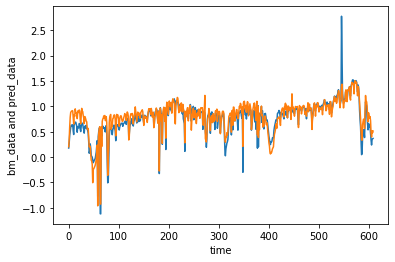

In [5]:
# 绘制图形

fig, axs = plt.subplots(1, 1)
x_data = np.arange(0,609)
pred_data_t = pred_data[0]
consume_data_t = consume_data[0]
axs.plot(x_data,consume_data_t, x_data, pred_data_t)

axs.set_xlabel('time')
axs.set_ylabel('bm_data and pred_data')


In [6]:
# 计算r2

r2 = r2_score(consume_data_t,pred_data_t)
r2

0.8287205265408415

In [ ]:
# 最后预测 r2 的结果为 0.82